In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, Input
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('heart.csv')

In [3]:
# Step 1: Preprocessing the data
# Separate features and target
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Reshape the data to 3D (samples, time_steps, features)
# We'll use each feature as a time step (X_train_scaled.shape[1] represents features)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [7]:
# Step 2: Building the RNN model
model = Sequential()

In [8]:
# Input layer with first SimpleRNN layer
# We use 100 units in the RNN layer
model.add(Input(shape=(X_train_scaled.shape[1], 1)))
model.add(SimpleRNN(100, activation='relu'))

In [9]:
# Adding dropout to prevent overfitting
model.add(Dropout(0.3))


In [10]:
# Second hidden layer (fully connected)
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

In [11]:
# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Step 3: Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9283 - loss: 0.2012 - val_accuracy: 0.8033 - val_loss: 0.5849
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9312 - loss: 0.1877 - val_accuracy: 0.8197 - val_loss: 0.5715
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9305 - loss: 0.1815 - val_accuracy: 0.8197 - val_loss: 0.5938
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9255 - loss: 0.1891 - val_accuracy: 0.8197 - val_loss: 0.6110
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9481 - loss: 0.1312 - val_accuracy: 0.8197 - val_loss: 0.6269
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9587 - loss: 0.1342 - val_accuracy: 0.8361 - val_loss: 0.5722
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9451 - loss: 0.1267 - val_accuracy: 0.8197 - val_loss: 0.7077
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9655 - loss: 0.1110 - val_accuracy: 0.8361 - val_loss:

In [15]:
# Step 4: Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8287 - loss: 1.4868 
Test Accuracy: 0.8524590134620667


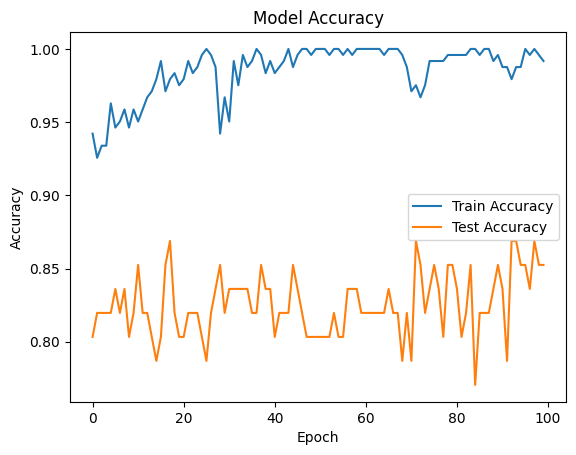

In [16]:
# Step 5: Plotting accuracy curves for training and testing
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [17]:
# Step 6: Predicting for new input
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Create an input array based on the values provided
    new_input = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Step 1: Scale the new input using the same scaler used on the training data
    new_input_scaled = scaler.transform(new_input)

    # Step 2: Reshape the input to match the RNN's expected input shape (samples, time_steps, features)
    new_input_scaled = new_input_scaled.reshape((new_input_scaled.shape[0], new_input_scaled.shape[1], 1))

    # Step 3: Use the model to predict the outcome
    prediction = model.predict(new_input_scaled)

    # Step 4: Get the predicted class (0 or 1) by checking if the prediction probability is > 0.5
    predicted_class = (prediction > 0.5).astype(int)

    # Print the result
    if predicted_class[0][0] == 0:
        return "Prediction: No Heart Disease"
    else:
        return "Prediction: Heart Disease"

# Step 7: Taking user input
age = float(input("Enter age: "))
sex = int(input("Enter sex (1 = male, 0 = female): "))
cp = int(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure (in mm Hg): "))
chol = float(input("Enter serum cholesterol in mg/dl: "))
fbs = int(input("Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved: "))
exang = int(input("Enter exercise induced angina (1 = yes, 0 = no): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter slope of the peak exercise ST segment (0-2): "))
ca = int(input("Enter number of major vessels (0-3) colored by fluoroscopy: "))
thal = int(input("Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect): "))

# Call the prediction function with user input
result = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
print(result)

Enter age:  65
Enter sex (1 = male, 0 = female):  1
Enter chest pain type (0-3):  1
Enter resting blood pressure (in mm Hg):  110
Enter serum cholesterol in mg/dl:  203
Enter fasting blood sugar > 120 mg/dl (1 = true, 0 = false):  1
Enter resting electrocardiographic results (0-2):  0
Enter maximum heart rate achieved:  1
Enter exercise induced angina (1 = yes, 0 = no):  1
Enter ST depression induced by exercise relative to rest:  3.1
Enter slope of the peak exercise ST segment (0-2):  1
Enter number of major vessels (0-3) colored by fluoroscopy:  0
Enter thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect):  3


C:\Users\Local User\desktop\python_2308\my_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Prediction: No Heart Disease
